# Welcome to project Stockgo!
<div style="padding: 15px; border: 1px solid transparent; border-color: transparent; margin-bottom: 20px; border-radius: 4px; color: #FFFFFF; background-color: #DD0000; border-color: #ebccd1;">
Change the ##### in the filename to your student number!
</div>

<div style="padding: 15px; border: 1px solid transparent; border-color: transparent; margin-bottom: 20px; border-radius: 4px; color: #FFFFFF; background-color: #DD0000; border-color: #ebccd1;">
There's an acompannying quiz on moodle, don't forget!
</div>

You were given the challenge of building code that could easily compare stock data.  
Since you want to learn more about the stock market, you accept.

You are given two datasets, [ALBE.csv](ALBE.csv) and [TSLA.csv](TSLA.csv), representing stock data from [Albemarle](https://en.wikipedia.org/wiki/Albemarle_Corporation) and [Tesla](https://en.wikipedia.org/wiki/Tesla,_Inc.), respectively
* Albemarle is a chemical manufacturing company with a major Lithium production output for batteries.
* Tesla is the famous automotive and clean tech company.

To better prepare for future analysis you decide to develop some code to speed things up.
<div style="padding: 15px; border: 1px solid transparent; border-color: transparent; margin-bottom: 20px; border-radius: 4px; color: #FFFFFF; background-color: #DD0000; border-color: #ebccd1;">
When referring to arguments of functions, classes, and methods, we assume you have already included the mandatory ones.
</div>

---
## The datasets

Every stock price dataset has the same structure:

* __Date__: Temporal information about the day the rest of the data corresponds.
* __Open__: The price of the stock at the start of the trading period.
* __High__: The highest intraday price of the stock.
* __Low__: The lowest intraday price of the stock.
* __Close__: The price of the stock at the end of the trading period.
* __Volume__: How many stocks were traded.

---
## The Analysis

### Exploration (10%)
1. What is the combination of directives and characters that allows you to read the ALBE.csv item that has temporal information?
1. And for TSLA.csv?

### Stockgo
You decide to write a class called __Stockgo__ that speeds up your analysis. Write a simple docstring in the appropriate place for a class that lists just the __Attributes__ and the __Methods__. Make sure you separate the former two so they are readable by another user.

#### Initializing (30%)
When initialized, the class must have as arguments:
1. A __filename__ parameter, without a default argument.
1. A __directives__ string parameter with a default value of the ISO 8601 format with delimiters.
1. A __label__ parameter with a default value of "stock".
1. Make sure the former three arguments are stored as attributes of the class.
1. Make a fourth attribute called __trimmed__ with a default value of __False__. This is a surprise tool that will help us later.
1. Make a _try-except_ snippet that attempts to read __filename__ into an attribute called __df__, which should be a pandas dataframe. If it is not found the code should __raise__ a _FileNotFoundError_ with an appropriate message.
1. Convert the temporal info column of the df attribute into a datetime format using the directives attribute you just created.
1. Set the newly converted column as the index of the df pandas dataframe attribute.

#### Small report (10%)
Write a __report__ method for the class.
1. The method receives an argument __column__ with default value of 'High'.
1. The _method_ should __print__ the output of the _method_ of class attribute __df__ that describes statistical properties of the pandas dataframe.
1. The method should plot the data of the chosen column. The y axis label should be the chosen column and the legend should be the attribute __label__.
1. Write a one line docstring to describe what the method does.

#### Trim (20%)
Write a __trim__ method to filter out unwanted data.
1. The method should have a __start_date__ argument with a default value of "2011-01-01".
1. The method should have an __end_date__ argument with a default value of "2017-01-01".
1. If __start_date__ or __end_date__ are not of type string, raise a TypeError with message "Both temporal arguments must be strings".
1. If __start_date__ or __end_date__ don't have a length of 10, raise an Exception with message "Both arguments must have length 10."
1. If you try to convert __start_date__ to a temporal format and you fail, raise an Exception with message "Can't convert start_date to temporal format"
1. If you try to convert __end_date__ to a temporal format and you fail, raise an Exception with message "Can't convert end_date to temporal format"
1. Change the dataframe so it now only has data between start_date and end_date, inclusively.
1. Change the __trimmed__ attribute to True (I told you).
1. Write a one line docstring for the method.
---
### Reading data (20%)
1. Create a __ca__ instance of Stockgo. It should read the Albemerle file and have the right __directives__ argument. Use _ALBE_ for label.
1. Create a __ct__ instance of Stockgo. It should read the Tesla file and have the right __directives__ argument. Use _TSLA_ for label.
1. Trim() both objects with default arguments.
1. Use the report method for both objects:
    1. Which stock has a higher 'Open' mean?
    1. Which stock has a higher 'Open' 25% percentile?
    
You now have your objects ready. Let's do a small analysis of the data.
---
### Analysis (10%)
We want to check how the intraday __Highest__ stock value has evolved with TSLA ans ALBE. Many products produced by TSLA are dependent on Lithium price, a commodity ALBE produces. In a simple economic model, TSLA stock should be high if Lithium prices are low, as margins increase. Technology firms are incredibly susceptible to commodity price increases. However, if commodity prices increase, ALBE will tend to be traded at a higher value. This could decerase TSLA value, as margins decrease (again, this is a very simplistic interpretation just for the sake of this simple analysis).

<div style="padding: 15px; border: 1px solid transparent; border-color: transparent; margin-bottom: 20px; border-radius: 4px; color: #FFFFFF; background-color: #00BB00; border-color: #ebccd1;">
It is safe to ingore warnings from scikit-learn for this exercise.
</div>

1. Make a scatter plot of the __High__ values of ca(x-axis) and ct(y-axis). How many clusters of points does there seem to be? 
1. Let's use an unsupervised clustering algorithm to help us out. After reading the documentation for [scikit-learn](https://scikit-learn.org/stable/modules/clustering.html), you decide to go for [Spectral Clustering](https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering).
1. Declare an __X__ variable that will be used for the clustering exercise. After reading the documentation you realize you need to vertically stack the values of __ca__ and __ct__ you are analysing and then transpose them.
1. Declare a variable __scl__ where you will .fit(X) to SpectralClustering with __affinity="nearest_neighbors", n_clusters=__ the number you decided. The variable __scl__ has an attribute called __labels\___ which keep the info for the clusters.
1. Do a scatter plot of ca and ct like in point 1, but use __c=scl.labels\___.
1. Do a scatter plot of ca and ct over time, but now the x-axis is Date (ca.df.index) and the y-axis is the 'High' column. Again, use __c=scl.labels\___ for each line.
1. Finally, what happens when ALBE stock goes above a certain threshold (meaning Lithium prices probably went above a certain price)?

<div style="padding: 15px; border: 1px solid transparent; border-color: transparent; margin-bottom: 20px; border-radius: 4px; color: #FFFFFF; background-color: #DD0000; border-color: #ebccd1;">
Read everything carefully!
</div>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import SpectralClustering

In [11]:
da = pd.read_csv("ALBE.csv")
da.head()

,Date,Open,High,Low,Close,Volume
0,05--02--25,16.838,17.252,16.776,17.243,918662
1,05--02--28,17.233,17.272,16.948,17.100,777776
2,05--03--01,17.118,17.423,17.118,17.281,415110
3,05--03--02,17.118,17.406,17.036,17.181,417997
4,05--03--03,17.233,17.388,17.118,17.198,294221


In [12]:
dt = pd.read_csv("TSLA.csv")
dt.head()

,Date,Open,High,Low,Close,Volume
0,2010+06+28,17.00,17.00,17.00,17.00,0
1,2010+06+29,19.00,25.00,17.54,23.89,18783276
2,2010+06+30,25.79,30.42,23.30,23.83,17194394
3,2010+07+01,25.00,25.92,20.27,21.96,8229863
4,2010+07+02,23.00,23.10,18.71,19.20,5141807


In [13]:
class Stockgo:
    """
    Methods
    ----------
    report
    trim
    """
    def __init__(self, filename, directives='%Y-%m-%d', label="stock"):
        self.filename = filename
        self.directives = directives
        self.label = label
        self.trimmed = False
        
        # Attempt to read the file
        try:
            self.df = pd.read_csv(filename)
        except:
            raise FileNotFoundError(f"I can't find {filename}.")
        
        # Converts Date into a datetime format
        self.df["Date"] = pd.to_datetime(self.df["Date"], format=self.directives)
        
        # Sets Date as index
        self.df.set_index("Date", inplace=True)
        
    def report(self, column='High'):
        """
        Prints a report for the data and plots the eevolution of the chosen column over time.
        """
        # Prints a report
        print(self.df.describe())
        
        #Plots the data
        self.df.plot(y=column,label=self.label)
        plt.ylabel(column)
 
    def trim(self, start_date="2011-01-01", end_date="2017-01-01"):
        """
        Deletes data outside of the selected interval
        """
        # If start_date not str OR end_date not str
        if (type(start_date) is not str) | (type(end_date) is not str):
            raise TypeError("Both temporal arguments must be strings")
            
        # If lens not 10
        if (len(start_date)!=10) | (len(end_date)!=10):
            raise Exception("Both arguments must have length 10.")
        
        # Try to convert to datetime
        try:
            pd.to_datetime(start_date)
        except:
            raise Exception("Can't convert start_date to temporal format")
            
        # Try to convert to datetime
        try:
            pd.to_datetime(end_date)
        except:
            raise Exception("Can't convert end_date to temporal format")

        # Filter interval
        self.df = self.df[(self.df.index>=start_date) & (self.df.index<=end_date)]
        self.trimmed = True

In [14]:
# Read with directives
ca = Stockgo("ALBE.csv", label='ALBE', directives="%y--%m--%d")
ct = Stockgo("TSLA.csv", label='TSLA', directives="%Y+%m+%d")

In [15]:
# Trim
ca.trim()
ct.trim()

              Open         High          Low        Close        Volume
count  1509.000000  1509.000000  1509.000000  1509.000000  1.509000e+03
mean     58.473472    59.132152    57.800056    58.477167  1.112047e+06
std       9.935610     9.943729     9.942785     9.935202  1.038073e+06
min      34.867000    36.619000    34.532000    35.423000  1.695820e+05
25%      51.813000    52.402000    51.125000    51.860000  6.283440e+05
50%      57.926000    58.450000    57.354000    57.908000  9.124600e+05
75%      61.687000    62.303000    61.009000    61.635000  1.360416e+06
max      90.692000    91.150000    89.588000    90.715000  2.529283e+07


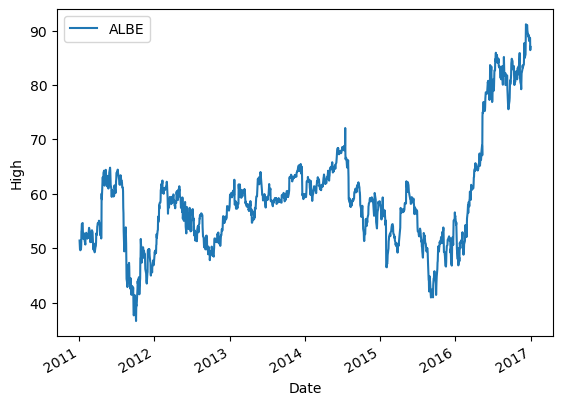

In [16]:
# Report 1
ca.report()

              Open         High          Low        Close        Volume
count  1509.000000  1509.000000  1509.000000  1509.000000  1.509000e+03
mean    137.840871   140.273997   135.258354   137.800422  4.385860e+06
std      91.767546    93.135926    90.288835    91.731276  4.366989e+06
min      21.780000    22.270000    21.110000    21.830000  2.395950e+05
25%      31.860000    32.350000    31.010000    31.800000  1.298731e+06
50%     172.420000   177.780000   168.000000   173.310000  3.194201e+06
75%     220.150000   223.400000   216.800000   219.610000  5.726064e+06
max     287.670000   291.420000   280.400000   286.040000  3.714989e+07


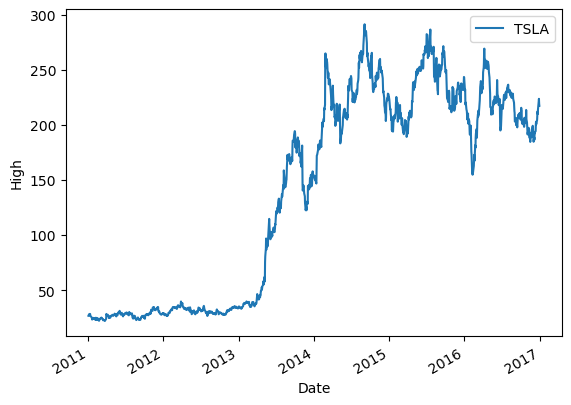

In [17]:
# Report 2
ct.report()

### Answer:
1. The stock with highest open mean is Tesla. 
1. The stock with highest 25% percentile is Albemerle.


**Note**: in case you did provide a written answer to these questions, 1 out of 4 points were deducted from the "Reading data" section.

---

### Analysis

Text(0, 0.5, 'TSLA')

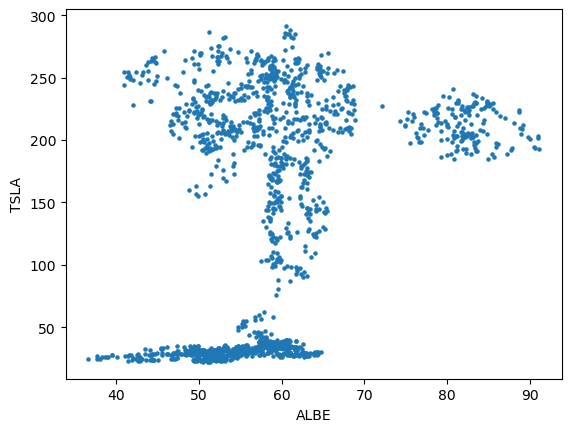

In [18]:
plt.scatter(ca.df['High'], ct.df['High'], s=5)
plt.xlabel(ca.label)
plt.ylabel(ct.label)

In [19]:
column = 'High'
X = np.vstack((ct.df[column].values, ca.df[column].values)).T
        
# Run Spectral CLustering
scl = SpectralClustering(affinity="nearest_neighbors", n_clusters=3).fit(X)    

d:\Programs\anaconda\envs\adpro2023\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
d:\Programs\anaconda\envs\adpro2023\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


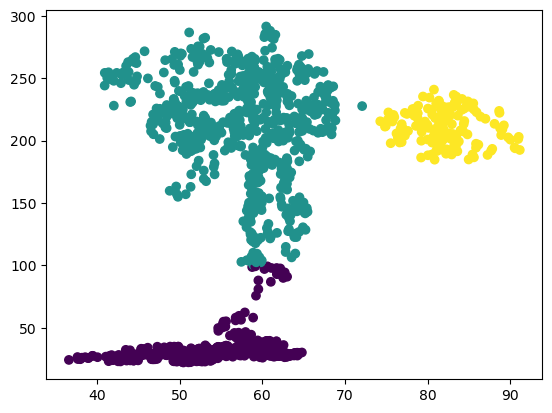

In [20]:
plt.scatter(ca.df['High'], ct.df['High'], c=scl.labels_)

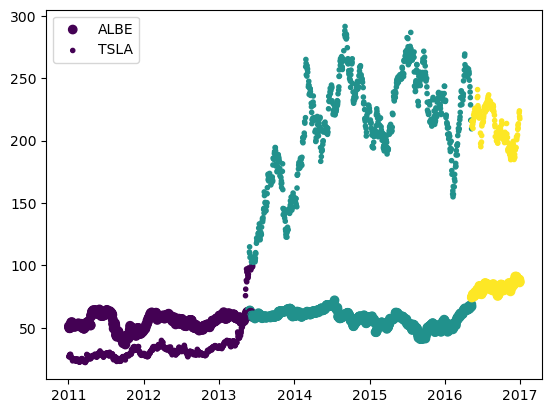

In [21]:
plt.scatter(ca.df.index, ca.df['High'], c=scl.labels_, label=ca.label, marker='o')
plt.scatter(ct.df.index, ct.df['High'], c=scl.labels_, label=ct.label, marker='.')
plt.legend()

### Answer:
It seems than when ALBE stock go above a certain threshold, indicating Lithium prices went above a certain threshold as well, TSLA stock goes in a downward trend, but more data is needed.

**Notes**: 
- In case you did provide a written answer to these questions, 1 out of 7 points was deducted from the "Analysis" section.
- Also, in case you ploted seperate graphs for each stock (as opposed to one graph for both stocks) 1 out 7 points was deducted from the "Analysis" section.